In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import joblib

In [2]:
# Load the data
file_path = 'Phishing_Legitimate_full.csv'
data = pd.read_csv(file_path)

In [3]:
# Split the data into features and target
X = data.drop(columns=['CLASS_LABEL', 'id'])
y = data['CLASS_LABEL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = xgb_clf.predict(X_train)

# Make predictions on the test set
y_test_pred = xgb_clf.predict(X_test)

In [5]:
# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy}")

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)

Training Accuracy: 1.0
Testing Accuracy: 0.9895
Confusion Matrix:
[[ 974   14]
 [   7 1005]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       988
           1       0.99      0.99      0.99      1012

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [6]:
# Save the model to a file
model_filename = 'xgboost_phishing_model.joblib'
joblib.dump(xgb_clf, model_filename)
print(f"Model saved to {model_filename}")

Model saved to xgboost_phishing_model.joblib


<Figure size 1000x800 with 0 Axes>

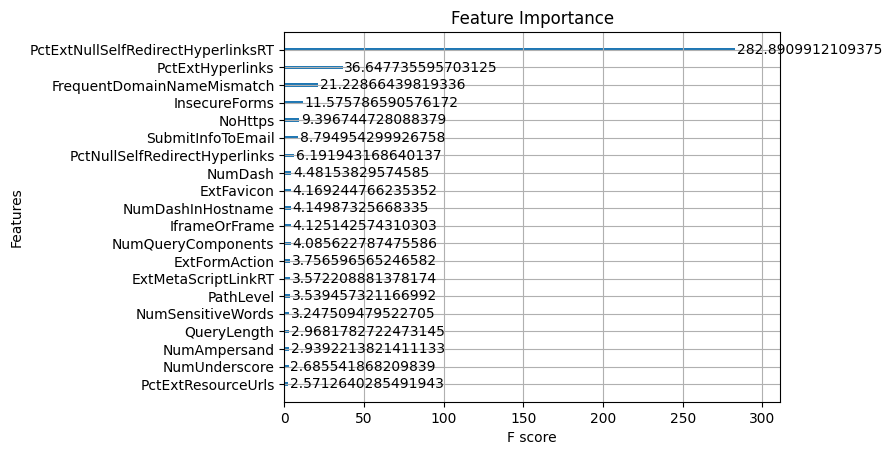

In [7]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_clf, max_num_features=20, importance_type='gain')
plt.title('Feature Importance')
plt.show()